In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import plotly.express as px

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
url = 'https://raw.githubusercontent.com/Amnuaysak/HomeWork_codecamp_5/master/pca/datasets_308180_627001_Wine.csv'
df = pd.read_csv(url)

#https://www.kaggle.com/sadeghjalalian/wine-customer-segmentation

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

from sklearn.model_selection import GridSearchCV

# 1 - 14
**ข้อ 1**

In [4]:
df.sample(5)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
149,13.08,3.90,2.36,21.5,113,1.41,1.39,0.34,1.14,9.40,0.57,1.33,550,3
100,12.08,2.08,1.70,17.5,97,2.23,2.17,0.26,1.40,3.30,1.27,2.96,710,2
79,12.70,3.87,2.40,23.0,101,2.83,2.55,0.43,1.95,2.57,1.19,3.13,463,2
81,12.72,1.81,2.20,18.8,86,2.20,2.53,0.26,1.77,3.90,1.16,3.14,714,2
95,12.47,1.52,2.20,19.0,162,2.50,2.27,0.32,3.28,2.60,1.16,2.63,937,2


In [5]:
df.head(10)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,1
6,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290,1
7,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295,1
8,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045,1
9,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045,1


In [6]:
df.tail(10)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
168,13.58,2.58,2.69,24.5,105,1.55,0.84,0.39,1.54,8.660000,0.74,1.80,750,3
169,13.40,4.60,2.86,25.0,112,1.98,0.96,0.27,1.11,8.500000,0.67,1.92,630,3
170,12.20,3.03,2.32,19.0,96,1.25,0.49,0.40,0.73,5.500000,0.66,1.83,510,3
171,12.77,2.39,2.28,19.5,86,1.39,0.51,0.48,0.64,9.899999,0.57,1.63,470,3
172,14.16,2.51,2.48,20.0,91,1.68,0.70,0.44,1.24,9.700000,0.62,1.71,660,3
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.700000,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.300000,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.200000,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.300000,0.60,1.62,840,3
177,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.200000,0.61,1.60,560,3


**ข้อ 3 - 4**
ไม่มีข้อมูลสูญหาย

In [7]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


**ข้อ 5**

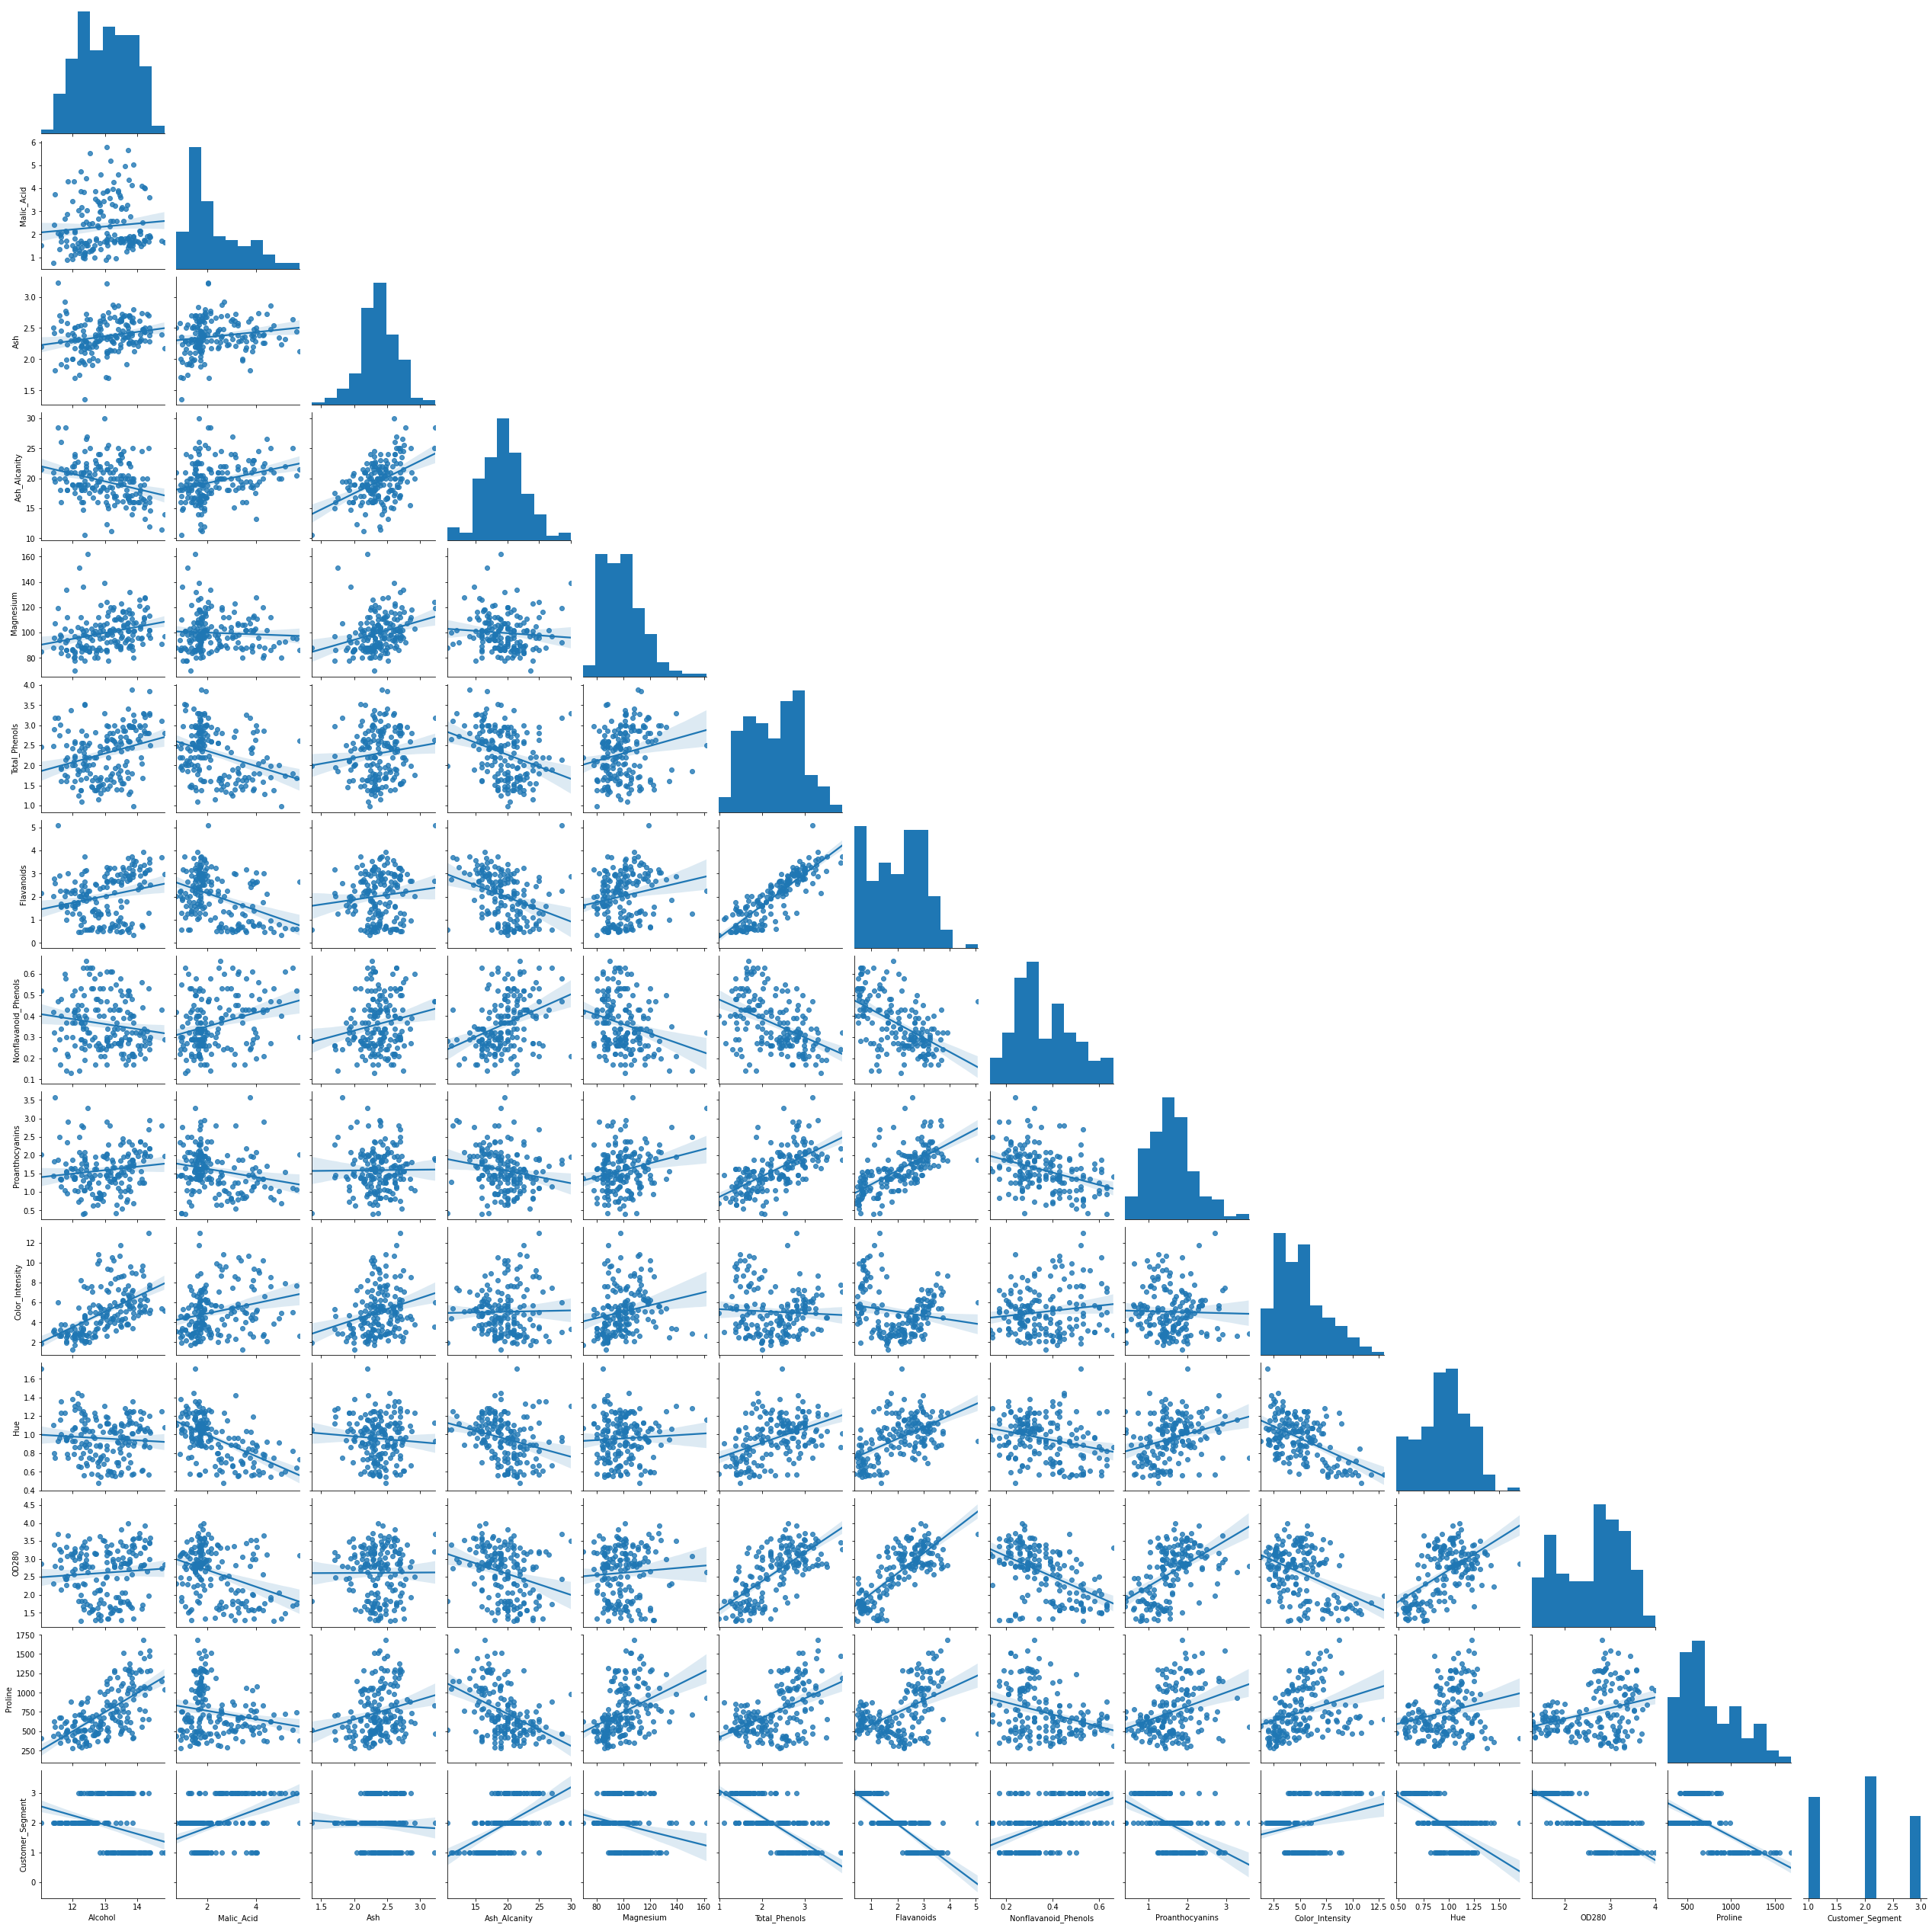

In [9]:
sns.pairplot(df,kind='reg',corner=True)

**ข้อ 7**

In [10]:
df.corr()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
Alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
Malic_Acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
Ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
Ash_Alcanity,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
Magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
Total_Phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
Nonflavanoid_Phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
Color_Intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


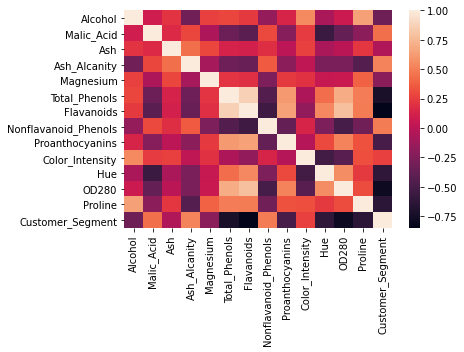

In [11]:
sns.heatmap(df.corr())

**ข้อ 8 - 10**

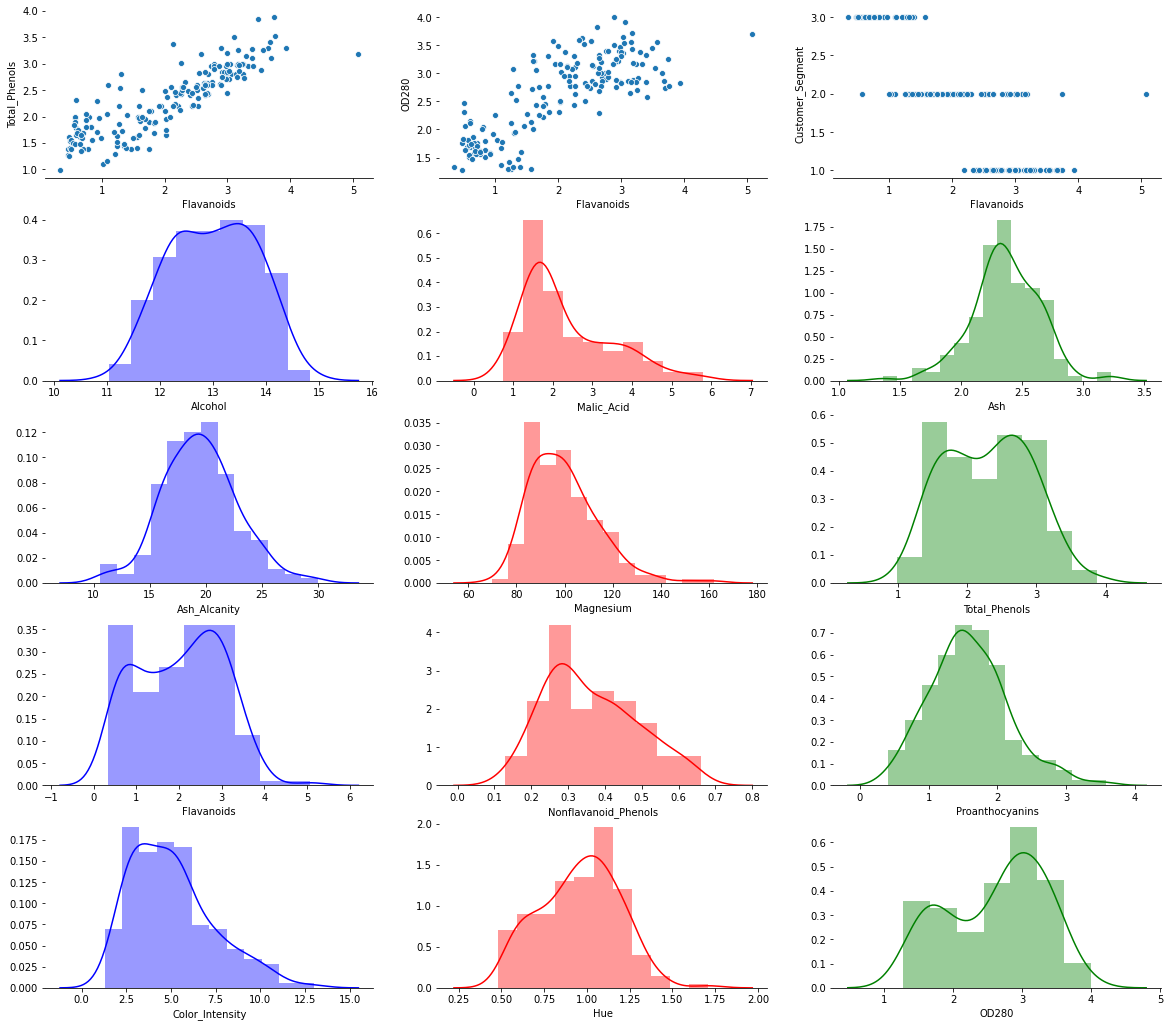

In [12]:
f, axes = plt.subplots(5, 3, figsize=(20, 18), sharex=False)
sns.despine(left=True)

sns.scatterplot(x=df.iloc[:,6],y=df.iloc[:,5],data=df, ax=axes[0, 0])
sns.scatterplot(x=df.iloc[:,6],y=df.iloc[:,11],data=df, ax=axes[0, 1])
sns.scatterplot(x=df.iloc[:,6],y=df.iloc[:,13],data=df, ax=axes[0, 2])

sns.distplot(df.iloc[:,0], kde=True, color="b", ax=axes[1,0]) 
sns.distplot(df.iloc[:,1], kde=True, color="r", ax=axes[1,1])
sns.distplot(df.iloc[:,2], kde=True, color="g", ax=axes[1,2])

sns.distplot(df.iloc[:,3], kde=True, color="b", ax=axes[2,0]) 
sns.distplot(df.iloc[:,4], kde=True, color="r", ax=axes[2,1])
sns.distplot(df.iloc[:,5], kde=True, color="g", ax=axes[2,2])

sns.distplot(df.iloc[:,6], kde=True, color="b", ax=axes[3,0]) 
sns.distplot(df.iloc[:,7], kde=True, color="r", ax=axes[3,1])
sns.distplot(df.iloc[:,8], kde=True, color="g", ax=axes[3,2])

sns.distplot(df.iloc[:,9], kde=True, color="b", ax=axes[4,0]) 
sns.distplot(df.iloc[:,10], kde=True, color="r", ax=axes[4,1])
sns.distplot(df.iloc[:,11], kde=True, color="g", ax=axes[4,2])

#sns.countplot(df.iloc[:,2], ax=axes[1, 0])
#sns.countplot(df.iloc[:,3], ax=axes[1, 1])
#sns.scatterplot(x=df.iloc[:,6],y=df.iloc[:,10],data=df, ax=axes[1, 2])


[link text](https://python.astrotech.io/numerical-analysis/data-visualization/plotly.html)

[link text](https://www.kaggle.com/kanncaa1/plotly-tutorial-for-beginners)

[link text](https://www.geeksforgeeks.org/box-plot-in-plotly-using-graph_objects-class/ [link text](https://))

**ข้อ 11 - 12** ค่า Outlier และจำนวนข้อมูล มีจำนวนน้อยและขาดความเข้าใจในค่าดังกล่าว ดังนั้นจึงเก็บค่า Outlier ไว้เพื่อประโยชน์ในการสร้าง model

In [13]:
import plotly.graph_objects as px 
#x = ['A', 'B', 'C', 'D'] 
  
plot = px.Figure() 
  
plot.add_trace(px.Box(y=df.iloc[:,1],name=df.columns[1])) 
plot.add_trace(px.Box(y=df.iloc[:,2],name=df.columns[2]))
plot.add_trace(px.Box(y=df.iloc[:,5],name=df.columns[5])) 
plot.add_trace(px.Box(y=df.iloc[:,6],name=df.columns[6]))
plot.add_trace(px.Box(y=df.iloc[:,8],name=df.columns[8]))
plot.add_trace(px.Box(y=df.iloc[:,9],name=df.columns[9]))
  
plot.show()

In [14]:
plot = px.Figure() 
  
plot.add_trace(px.Box(y=df.iloc[:,0],name=df.columns[0])) 
plot.add_trace(px.Box(y=df.iloc[:,3],name=df.columns[3]))

  
plot.show()

In [15]:
plot = px.Figure() 
  
plot.add_trace(px.Box(y=df.iloc[:,4],name=df.columns[4])) 
  
plot.show()

In [16]:
plot = px.Figure() 
  
plot.add_trace(px.Box(y=df.iloc[:,12],name=df.columns[12])) 

plot.show()

**ข้อ 13 - 14**

In [17]:
label_col = 13 #กำหนด index ให้ label เพื่อความสะดวกในการแก้ code 

X = df.drop(df.columns[label_col],axis=1)
y = df.iloc[:,[label_col]]

X_train , X_test ,y_train , y_test = train_test_split(X,y,train_size = 0.7,random_state=100)

In [18]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [19]:
#X_train = pd.DataFrame(X_train,columns=df.iloc[:,0:13].columns)
#X_test = pd.DataFrame(X_test,columns=df.iloc[:,0:13].columns)

# ข้อ 15-17

**Base Line 1 : Support Vector Regression**

In [20]:
svc = SVC()
svc.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [21]:
y_predict = svc.predict(X_test)

In [22]:
confusion_matrix(y_test,y_predict)

array([[14,  0,  0],
       [ 0, 19,  0],
       [ 0,  1, 20]])

In [23]:
accuracy_score(y_test,y_predict),f1_score(y_test,y_predict,average = 'micro'),precision_score(y_test,y_predict,average = 'micro'),recall_score(y_test,y_predict,average = 'micro')

(0.9814814814814815,
 0.9814814814814815,
 0.9814814814814815,
 0.9814814814814815)

In [24]:
accuracy_score(y_test,y_predict),f1_score(y_test,y_predict,average = 'macro'),precision_score(y_test,y_predict,average = 'macro'),recall_score(y_test,y_predict,average = 'macro')

(0.9814814814814815,
 0.9833229101521784,
 0.9833333333333334,
 0.9841269841269842)

In [25]:
rows = ['svc']
columns = ['acc_mic','f1_mic','ps_mic','rs_mic','acc_mac','f1_mac','ps_mac','rs_mac']
values = [[0.9814814814814815,0.9814814814814815,0.9814814814814815,0.9814814814814815,0.9814814814814815,0.9833229101521784,0.9833333333333334,0.9841269841269842]]

df_compare = pd.DataFrame(data=values,columns=columns,index=rows)

**Base Line 2 : Random Forrest**

In [26]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [27]:
y_predict = rf.predict(X_test)

In [28]:
confusion_matrix(y_test,y_predict)

array([[14,  0,  0],
       [ 0, 19,  0],
       [ 0,  0, 21]])

In [29]:
accuracy_score(y_test,y_predict),f1_score(y_test,y_predict,average = 'micro'),precision_score(y_test,y_predict,average = 'micro'),recall_score(y_test,y_predict,average = 'micro')

(1.0, 1.0, 1.0, 1.0)

In [30]:
accuracy_score(y_test,y_predict),f1_score(y_test,y_predict,average = 'macro'),precision_score(y_test,y_predict,average = 'macro'),recall_score(y_test,y_predict,average = 'macro')

(1.0, 1.0, 1.0, 1.0)

In [31]:
rows = ['rf']
columns = ['acc_mic','f1_mic','ps_mic','rs_mic','acc_mac','f1_mac','ps_mac','rs_mac']
values = [[1.0, 1.0, 1.0, 1.0,1.0, 1.0, 1.0, 1.0]]

df_compare = pd.concat([df_compare,pd.DataFrame(data=values,columns=columns,index=rows)])

**Base Line 3:**

In [32]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [33]:
y_predict = dt.predict(X_test)

In [34]:
confusion_matrix(y_test,y_predict)

array([[14,  0,  0],
       [ 0, 17,  2],
       [ 2,  3, 16]])

In [35]:
accuracy_score(y_test,y_predict),f1_score(y_test,y_predict,average = 'micro'),precision_score(y_test,y_predict,average = 'micro'),recall_score(y_test,y_predict,average = 'micro')

(0.8703703703703703,
 0.8703703703703703,
 0.8703703703703703,
 0.8703703703703703)

In [36]:
accuracy_score(y_test,y_predict),f1_score(y_test,y_predict,average = 'macro'),precision_score(y_test,y_predict,average = 'macro'),recall_score(y_test,y_predict,average = 'macro')

(0.8703703703703703,
 0.8752136752136752,
 0.8712962962962963,
 0.8855472013366751)

In [37]:
rows = ['dt']
columns = ['acc_mic','f1_mic','ps_mic','rs_mic','acc_mac','f1_mac','ps_mac','rs_mac']
values = [[0.7777777777777778,0.7777777777777778,0.7777777777777778,0.7777777777777778,0.7777777777777778,0.7824074074074074,0.7862433862433863,0.8028404344193817]]

df_compare = pd.concat([df_compare,pd.DataFrame(data=values,columns=columns,index=rows)])

# ข้อ 18-19

**ทำ hyperparameter tuning ด้วย GridSearchCV กับ Support Vector Regression**

In [38]:
param_com = {'C':[100,1000,10000],'gamma':[0.00001,0.0001,0.001]}
grid_search = GridSearchCV(svc,param_com)

In [39]:
grid_search.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConv

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [100, 1000, 10000],
                         'gamma': [1e-05, 0.0001, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [40]:
grid_search.best_params_

{'C': 100, 'gamma': 0.001}

In [41]:
grid_search.best_estimator_

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [42]:
y_predict = grid_search.predict(X_test)

In [43]:
confusion_matrix(y_test,y_predict)

array([[14,  0,  0],
       [ 0, 18,  1],
       [ 1,  1, 19]])

In [44]:
accuracy_score(y_test,y_predict),f1_score(y_test,y_predict,average = 'micro'),precision_score(y_test,y_predict,average = 'micro'),recall_score(y_test,y_predict,average = 'micro')

(0.9444444444444444,
 0.9444444444444444,
 0.9444444444444444,
 0.9444444444444444)

In [45]:
accuracy_score(y_test,y_predict),f1_score(y_test,y_predict,average = 'macro'),precision_score(y_test,y_predict,average = 'macro'),recall_score(y_test,y_predict,average = 'macro')

(0.9444444444444444,
 0.9465716435748749,
 0.9435672514619883,
 0.9507101086048454)

In [46]:
rows = ['svc_hyp']
columns = ['acc_mic','f1_mic','ps_mic','rs_mic','acc_mac','f1_mac','ps_mac','rs_mac']
values = [[0.9444444444444444,0.9444444444444444,0.9444444444444444,0.9444444444444444,0.9444444444444444,0.9465716435748749,0.9435672514619883,0.9507101086048454]]

df_compare = pd.concat([df_compare,pd.DataFrame(data=values,columns=columns,index=rows)])

**ทำ hyperparameter tuning ด้วย GridSearchCV กับ Random Forrest**

In [47]:
param_combination = {'max_depth':[4,8,16,32],'min_samples_leaf':[1,2,4,8],'n_estimators':[10,20,50,100]}
grid_search1 = GridSearchCV(RandomForestClassifier(),param_combination,verbose=1)

In [48]:
grid_search1.fit(X_train,y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [49]:
grid_search1.best_params_

{'max_depth': 4, 'min_samples_leaf': 1, 'n_estimators': 100}

In [50]:
grid_search1.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [51]:
y_predict = grid_search1.predict(X_test)

In [52]:
confusion_matrix(y_test,y_predict)

array([[14,  0,  0],
       [ 0, 19,  0],
       [ 0,  0, 21]])

In [53]:
accuracy_score(y_test,y_predict),f1_score(y_test,y_predict,average = 'micro'),precision_score(y_test,y_predict,average = 'micro'),recall_score(y_test,y_predict,average = 'micro')

(1.0, 1.0, 1.0, 1.0)

In [54]:
accuracy_score(y_test,y_predict),f1_score(y_test,y_predict,average = 'macro'),precision_score(y_test,y_predict,average = 'macro'),recall_score(y_test,y_predict,average = 'macro')

(1.0, 1.0, 1.0, 1.0)

In [55]:
rows = ['rf_hyp']
columns = ['acc_mic','f1_mic','ps_mic','rs_mic','acc_mac','f1_mac','ps_mac','rs_mac']
values = [[1.0, 1.0, 1.0, 1.0,1.0, 1.0, 1.0, 1.0]]

df_compare = pd.concat([df_compare,pd.DataFrame(data=values,columns=columns,index=rows)])

**ทำ hyperparameter tuning ด้วย GridSearchCV กับ Decision Tree**

In [56]:
param_combination_1 = {'max_depth':[4,8,16,32],'min_samples_leaf':[1,2,4,8]}
grid_search2 = GridSearchCV(DecisionTreeClassifier(),param_combination_1,verbose=1)

In [57]:
grid_search2.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.2s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 8, 16, 32],
                     

In [58]:
y_predict = grid_search2.predict(X_test)

In [59]:
confusion_matrix(y_test,y_predict)

array([[14,  0,  0],
       [ 2, 15,  2],
       [ 2,  5, 14]])

In [60]:
accuracy_score(y_test,y_predict),f1_score(y_test,y_predict,average = 'micro'),precision_score(y_test,y_predict,average = 'micro'),recall_score(y_test,y_predict,average = 'micro')

(0.7962962962962963,
 0.7962962962962963,
 0.7962962962962963,
 0.7962962962962963)

In [61]:
accuracy_score(y_test,y_predict),f1_score(y_test,y_predict,average = 'macro'),precision_score(y_test,y_predict,average = 'macro'),recall_score(y_test,y_predict,average = 'macro')

(0.7962962962962963,
 0.8003291753291752,
 0.8009259259259259,
 0.8187134502923977)

In [62]:
rows = ['dt_hyp']
columns = ['acc_mic','f1_mic','ps_mic','rs_mic','acc_mac','f1_mac','ps_mac','rs_mac']
values = [[0.8518518518518519,0.8518518518518519,0.8518518518518519,0.8518518518518519,0.8518518518518519,0.8527777777777779,0.8624338624338624,0.8696741854636593]]

df_compare = pd.concat([df_compare,pd.DataFrame(data=values,columns=columns,index=rows)])

# ข้อ 20-25

**LDA**

In [63]:
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train,y_train)
X_test_lda = lda.transform(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [64]:
a=y_train.values

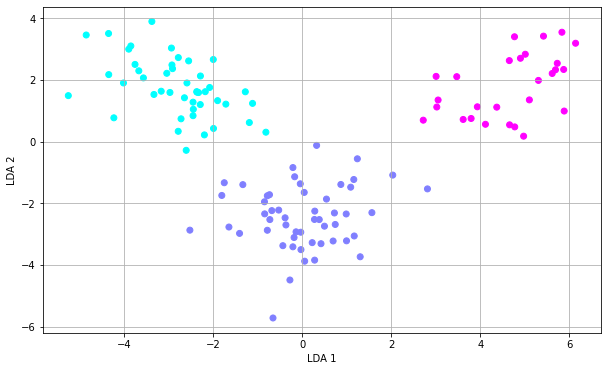

In [65]:
plt.figure(figsize=(10,6))
plt.scatter(X_train_lda[:,0],X_train_lda[:,1],cmap='cool',c=a)
plt.xlabel('LDA 1')
plt.ylabel('LDA 2')
plt.grid()

**SVC with LDA**

In [66]:
svc_lda = SVC()
svc_lda.fit(X_train_lda,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [67]:
y_predict = svc_lda.predict(X_test_lda)

In [68]:
confusion_matrix(y_test,y_predict)

array([[14,  0,  0],
       [ 0, 18,  1],
       [ 0,  0, 21]])

In [69]:
accuracy_score(y_test,y_predict),f1_score(y_test,y_predict,average = 'micro'),precision_score(y_test,y_predict,average = 'micro'),recall_score(y_test,y_predict,average = 'micro')

(0.9814814814814815,
 0.9814814814814815,
 0.9814814814814815,
 0.9814814814814815)

In [70]:
accuracy_score(y_test,y_predict),f1_score(y_test,y_predict,average = 'macro'),precision_score(y_test,y_predict,average = 'macro'),recall_score(y_test,y_predict,average = 'macro')

(0.9814814814814815, 0.983239053006495, 0.9848484848484849, 0.9824561403508771)

In [71]:
rows = ['svc_lda']
columns = ['acc_mic','f1_mic','ps_mic','rs_mic','acc_mac','f1_mac','ps_mac','rs_mac']
values = [[0.9814814814814815,0.9814814814814815,0.9814814814814815,0.9814814814814815,0.9814814814814815, 0.983239053006495, 0.9848484848484849, 0.9824561403508771]]

df_compare = pd.concat([df_compare,pd.DataFrame(data=values,columns=columns,index=rows)])

**RF with LDA**


In [72]:
rf_lda = RandomForestClassifier()
rf_lda.fit(X_train_lda,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [73]:
y_predict = rf_lda.predict(X_test_lda)

In [74]:
confusion_matrix(y_test,y_predict)

array([[14,  0,  0],
       [ 0, 18,  1],
       [ 0,  0, 21]])

In [75]:
accuracy_score(y_test,y_predict),f1_score(y_test,y_predict,average = 'micro'),precision_score(y_test,y_predict,average = 'micro'),recall_score(y_test,y_predict,average = 'micro')

(0.9814814814814815,
 0.9814814814814815,
 0.9814814814814815,
 0.9814814814814815)

In [76]:
accuracy_score(y_test,y_predict),f1_score(y_test,y_predict,average = 'macro'),precision_score(y_test,y_predict,average = 'macro'),recall_score(y_test,y_predict,average = 'macro')

(0.9814814814814815, 0.983239053006495, 0.9848484848484849, 0.9824561403508771)

In [77]:
rows = ['rf_lda']
columns = ['acc_mic','f1_mic','ps_mic','rs_mic','acc_mac','f1_mac','ps_mac','rs_mac']
values = [[0.9814814814814815,0.9814814814814815,0.9814814814814815,0.9814814814814815,0.9814814814814815, 0.983239053006495, 0.9848484848484849, 0.9824561403508771]]

df_compare = pd.concat([df_compare,pd.DataFrame(data=values,columns=columns,index=rows)])

**DT with LDA**

In [78]:
dt_lda = DecisionTreeClassifier()
dt_lda.fit(X_train_lda,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [79]:
y_predict = dt_lda.predict(X_test_lda)

In [80]:
confusion_matrix(y_test,y_predict)

array([[13,  1,  0],
       [ 0, 18,  1],
       [ 0,  0, 21]])

In [81]:
accuracy_score(y_test,y_predict),f1_score(y_test,y_predict,average = 'micro'),precision_score(y_test,y_predict,average = 'micro'),recall_score(y_test,y_predict,average = 'micro')

(0.9629629629629629,
 0.9629629629629629,
 0.9629629629629629,
 0.9629629629629629)

In [82]:
accuracy_score(y_test,y_predict),f1_score(y_test,y_predict,average = 'macro'),precision_score(y_test,y_predict,average = 'macro'),recall_score(y_test,y_predict,average = 'macro')

(0.9629629629629629, 0.9623585233540354, 0.967304625199362, 0.9586466165413534)

In [83]:
rows = ['dt_lda']
columns = ['acc_mic','f1_mic','ps_mic','rs_mic','acc_mac','f1_mac','ps_mac','rs_mac']
values = [[0.9629629629629629,0.9629629629629629,0.9629629629629629,0.9629629629629629,0.9629629629629629, 0.9623585233540354, 0.967304625199362, 0.9586466165413534]]

df_compare = pd.concat([df_compare,pd.DataFrame(data=values,columns=columns,index=rows)])

# ข้อ 26-27

**hyperparameter tuning ด้วย GridSearchCV กรณี SVC with LDA**

In [84]:
param_com = {'C':[100,1000,10000],'gamma':[0.00001,0.0001,0.001]}
grid_search_svc_lda = GridSearchCV(svc,param_com)

In [85]:
grid_search_svc_lda.fit(X_train_lda,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConv

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [100, 1000, 10000],
                         'gamma': [1e-05, 0.0001, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [86]:
grid_search_svc_lda.best_params_

{'C': 100, 'gamma': 1e-05}

In [87]:
grid_search_svc_lda.best_estimator_

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1e-05, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [88]:
y_predict = grid_search_svc_lda.predict(X_test_lda)

In [89]:
confusion_matrix(y_test,y_predict)

array([[14,  0,  0],
       [ 0, 19,  0],
       [ 0,  0, 21]])

In [90]:
accuracy_score(y_test,y_predict),f1_score(y_test,y_predict,average = 'micro'),precision_score(y_test,y_predict,average = 'micro'),recall_score(y_test,y_predict,average = 'micro')

(1.0, 1.0, 1.0, 1.0)

In [91]:
accuracy_score(y_test,y_predict),f1_score(y_test,y_predict,average = 'macro'),precision_score(y_test,y_predict,average = 'macro'),recall_score(y_test,y_predict,average = 'macro')

(1.0, 1.0, 1.0, 1.0)

In [92]:
rows = ['svc_lda_hyp']
columns = ['acc_mic','f1_mic','ps_mic','rs_mic','acc_mac','f1_mac','ps_mac','rs_mac']
values = [[1.0, 1.0, 1.0, 1.0,1.0, 1.0, 1.0, 1.0]]

df_compare = pd.concat([df_compare,pd.DataFrame(data=values,columns=columns,index=rows)])

**hyperparameter tuning ด้วย GridSearchCV กรณี RF with PCA**

In [93]:
param_combination = {'max_depth':[4,8,16,32],'min_samples_leaf':[1,2,4,8],'n_estimators':[10,20,50,100]}
grid_search_rf_lda = GridSearchCV(RandomForestClassifier(),param_combination,verbose=1)

In [94]:
grid_search_rf_lda.fit(X_train_lda,y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [95]:
grid_search_rf_lda.best_params_

{'max_depth': 32, 'min_samples_leaf': 1, 'n_estimators': 20}

In [96]:
grid_search_rf_lda.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=32, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [97]:
y_predict = grid_search_rf_lda.predict(X_test_lda)

In [98]:
confusion_matrix(y_test,y_predict)

array([[14,  0,  0],
       [ 0, 18,  1],
       [ 0,  1, 20]])

In [99]:
accuracy_score(y_test,y_predict),f1_score(y_test,y_predict,average = 'micro'),precision_score(y_test,y_predict,average = 'micro'),recall_score(y_test,y_predict,average = 'micro')

(0.9629629629629629,
 0.9629629629629629,
 0.9629629629629629,
 0.9629629629629629)

In [100]:
accuracy_score(y_test,y_predict),f1_score(y_test,y_predict,average = 'macro'),precision_score(y_test,y_predict,average = 'macro'),recall_score(y_test,y_predict,average = 'macro')

(0.9629629629629629,
 0.9665831244778612,
 0.9665831244778612,
 0.9665831244778612)

In [101]:
rows = ['rf_lda_hyp']
columns = ['acc_mic','f1_mic','ps_mic','rs_mic','acc_mac','f1_mac','ps_mac','rs_mac']
values = [[0.9814814814814815,0.9814814814814815,0.9814814814814815,0.9814814814814815,0.9814814814814815, 0.983239053006495, 0.9848484848484849, 0.9824561403508771]]

df_compare = pd.concat([df_compare,pd.DataFrame(data=values,columns=columns,index=rows)])

**hyperparameter tuning ด้วย GridSearchCV กรณี DTREE with LDA**

In [102]:
param_combination = {'max_depth':[4,8,16,32],'min_samples_leaf':[1,2,4,8]}
grid_search_dt_lda = GridSearchCV(DecisionTreeClassifier(),param_combination_1,verbose=1)

In [103]:
grid_search_dt_lda.fit(X_train_lda,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.2s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 8, 16, 32],
                     

In [104]:
y_predict = grid_search_dt_lda.predict(X_test_lda)

In [105]:
confusion_matrix(y_test,y_predict)

array([[13,  1,  0],
       [ 0, 19,  0],
       [ 0,  0, 21]])

In [106]:
accuracy_score(y_test,y_predict),f1_score(y_test,y_predict,average = 'micro'),precision_score(y_test,y_predict,average = 'micro'),recall_score(y_test,y_predict,average = 'micro')

(0.9814814814814815,
 0.9814814814814815,
 0.9814814814814815,
 0.9814814814814815)

In [107]:
accuracy_score(y_test,y_predict),f1_score(y_test,y_predict,average = 'macro'),precision_score(y_test,y_predict,average = 'macro'),recall_score(y_test,y_predict,average = 'macro')

(0.9814814814814815,
 0.9791073124406457,
 0.9833333333333334,
 0.9761904761904763)

In [108]:
rows = ['dt_lda_hyp']
columns = ['acc_mic','f1_mic','ps_mic','rs_mic','acc_mac','f1_mac','ps_mac','rs_mac']
values = [[0.9814814814814815,0.9814814814814815,0.9814814814814815,0.9814814814814815,0.9814814814814815,0.9791073124406457,0.9833333333333334,0.9761904761904763]]

df_compare = pd.concat([df_compare,pd.DataFrame(data=values,columns=columns,index=rows)])

# ข้อ 29-32

In [109]:
df_compare

,acc_mic,f1_mic,ps_mic,rs_mic,acc_mac,f1_mac,ps_mac,rs_mac
svc,0.981481,0.981481,0.981481,0.981481,0.981481,0.983323,0.983333,0.984127
rf,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
dt,0.777778,0.777778,0.777778,0.777778,0.777778,0.782407,0.786243,0.802840
svc_hyp,0.944444,0.944444,0.944444,0.944444,0.944444,0.946572,0.943567,0.950710
rf_hyp,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
dt_hyp,0.851852,0.851852,0.851852,0.851852,0.851852,0.852778,0.862434,0.869674
svc_lda,0.981481,0.981481,0.981481,0.981481,0.981481,0.983239,0.984848,0.982456
rf_lda,0.981481,0.981481,0.981481,0.981481,0.981481,0.983239,0.984848,0.982456
dt_lda,0.962963,0.962963,0.962963,0.962963,0.962963,0.962359,0.967305,0.958647
svc_lda_hyp,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [110]:
import plotly.graph_objects as go

In [111]:
model=df_compare.index

fig = go.Figure(data=[
    go.Bar(name='micro', x=model, y=df_compare.iloc[:,0]),
    go.Bar(name='macro', x=model, y=df_compare.iloc[:,4])
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.update_layout(title_text='ACC')
fig.show()

In [112]:
model=df_compare.index

fig = go.Figure(data=[
    go.Bar(name='micro', x=model, y=df_compare.iloc[:,1]),
    go.Bar(name='macro', x=model, y=df_compare.iloc[:,5])
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.update_layout(title_text='F1')
fig.show()

In [113]:
model=df_compare.index

fig = go.Figure(data=[
    go.Bar(name='micro', x=model, y=df_compare.iloc[:,2]),
    go.Bar(name='macro', x=model, y=df_compare.iloc[:,6])
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.update_layout(title_text='PS')
fig.show()

In [114]:
model=df_compare.index

fig = go.Figure(data=[
    go.Bar(name='micro', x=model, y=df_compare.iloc[:,3]),
    go.Bar(name='macro', x=model, y=df_compare.iloc[:,7])
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.update_layout(title_text='RS')
fig.show()